In [1]:
import numpy as np
from sa.main import learn_sa
from performance_table.generate import random_alternatives
from numpy.random import default_rng
from srmp.generate import random_srmp
from preference_structure.generate import random_comparisons
import io
import pandas as pd

In [28]:
rng = default_rng(0)
A = random_alternatives(50, 7, rng)
Mo = random_srmp(1, 7, rng)
D = random_comparisons(100, A, Mo, rng)

In [29]:
output = io.StringIO()
learn_sa("SRMP", 1, A, D, 0.01, 0.9999, 0.1, rng, rng, Tf=0.001, log_file=output)

SAResult(best_model=SRMPModel(profiles=<performance_table.normal_performance_table.NormalPerformanceTable object at 0x757713602e00>, weights=[0.13279317810947586, 0.17200094568025043, 0.05457739086315464, 0.48615104535006126, 0.010261076141349633, 0.07591544614260459, 0.06830091771310377], lexicographic_order=[0]), best_fitness=0.68, time=32.313265562057495, it=23025)

In [13]:
# output = io.FileIO("test_log.log")

In [14]:
output.seek(0)
df = pd.read_table(
    output,
    names=[
        "It.",
        "Non impr it.",
        "Time",
        "Temp",
        "Prof",
        "Weights",
        "Lex order",
        "Neigh fitness",
        "Curr fitness",
        "Best fitness"],
    decimal=".")
df["Neigh fitness"] = 1 - df["Neigh fitness"]
df["Curr fitness"] = 1 - df["Curr fitness"]
df["Best fitness"] = 1 - df["Best fitness"]

In [ ]:
df.loc[:, ["Neigh fitness", "Curr fitness", "Best fitness"]].plot()

<Axes: >

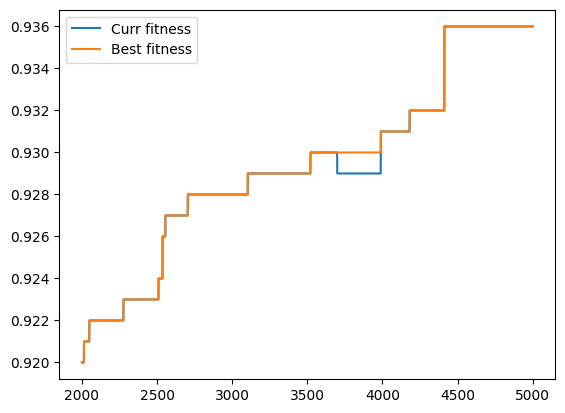

In [19]:
df.loc[2000:5000, ["Curr fitness", "Best fitness"]].plot()

In [ ]:
df["Prob"] = np.exp(-(1/100) / df["Temp"])